In [69]:
#function to make df's for scores in games 1 and 2 (s/d) for each condition from dictionaries with df's

#import the variables from SMAB_data_import
%store -r s_dict
%store -r c_dict
%store -r j_dict
%store -r m_dict

In [ ]:
#issue with c!

In [3]:
import csv
import pandas as pd
import numpy as np
import glob
import matplotlib
import scipy as sp
from matplotlib import pyplot as plt
from itertools import cycle, islice
from scipy import stats
from datetime import datetime

import seaborn as sns

In [4]:
s_dict

{'s01':      game number  trial  player  arm  probability  reward       time  \
 0              1      1       1    2           30       1  11.220698   
 1              1      1       2    1           90       1   2.742137   
 2              1      2       1    3           60       1   5.362458   
 3              1      2       2    1           90       1   3.699948   
 4              1      3       1    2           30       0   3.489552   
 ..           ...    ...     ...  ...          ...     ...        ...   
 395            2     98       2    1           90       1   2.578115   
 396            2     99       1    1           60       1   2.876227   
 397            2     99       2    1           90       1   2.675604   
 398            2    100       1    1           60       1   2.678057   
 399            2    100       2    1           90       1   2.680739   
 
      P1 score  P2 score  
 0           1         0  
 1           1         1  
 2           2         1  
 3     

In [5]:
'''Function called in choice_dist_and_avg to get the key of a dictionary based on the index'''
def get_nth_key(dictionary, n=0):
    if n < 0:
        n += len(dictionary)
    for i, key in enumerate(dictionary.keys()):
        if i == n:
            return key
    raise IndexError("dictionary index out of range") 

In [6]:
'''This function outputs the hole-probability mappings in each game. 
input: df of session data
output: df with the hole-probability mappings
g = game
p = player
h = hole
r = reward (1 means yes and 0 means no)

Note: if the probability is 0, this means that hole was never chosen and the actual probability must be deduced
'''

def hole_prob_map(df):
    h1_prob = get_prob(df,1)
    h2_prob = get_prob(df,2)
    h3_prob = get_prob(df,3)
    h_probs = pd.DataFrame({'h1_prob': [h1_prob], 'h2_prob': [h2_prob], 'h3_prob': [h3_prob]})
    
    return h_probs


In [7]:
def get_prob(df, arm):
    
    try:
        return(df.loc[df['arm'] == arm, 'probability'].iloc[0])
    #if the hole was never chosen
    except IndexError:
        #could change 0 to determine what the only 1 left is (30,60,or 90)
        return 0


In [8]:
'''Creates g1_scores and g2_scores df's and calls hole_prob_map and makes a df of that'''
def organize_score(dicti):
    length = len(dicti)
    
    i = 0
    
    g1_keys = []
    g2_keys = []
    
    g1_scores_list = []
    g2_scores_list = []
    
    while i < length:
        key = get_nth_key(dicti, n=i)
        #if the df is the score of g1, place it in the score 1 df
        if len(key) == 15:
            if key[8] == '1':
                g1_keys.append(key)
                
                g1_scores_list.append(dicti[key])
                
            elif key[8] == '2':
                g2_keys.append(key)
                
                g2_scores_list.append(dicti[key])
        
        i = i + 1
    

    g1_scores = pd.DataFrame({'pariticipant': g1_keys, 'score': g1_scores_list})
    g2_scores = pd.DataFrame({'pariticipant': g2_keys, 'score': g2_scores_list})
    
    return g1_scores, g2_scores

In [9]:
def get_hole_probs_map(dicti):
    length = len(dicti)
    
    i = 0
    
    map_dict = {}
    
    while i < length:
        key = get_nth_key(dicti, n=i)
        #if the df is the score of g1, place it in the score 1 df
        if len(key) == 9:
            df = hole_prob_map(dicti[key])
            map_dict[key] = df
        
        i = i + 1
    
    return map_dict

In [10]:
'''This function loops through a dictionary of dataframes and gets the number of holes chosen by each subject, placing
that in separate df's for g1 and g2.
input: dictionary with df's for each subject
output: df's for each game, with the number of times each hole was chosen by each subject '''
def get_value_counts(dicti):
    length = len(dicti)
    
    i = 0
    
    g1_keys = []
    g2_keys = []
    
    g1_counts_list = []
    g2_counts_list = []
    
    while i < length:
        key = get_nth_key(dicti, n=i)
        #if the df is the score of g1, place it in the score 1 df
        if len(key) == 9:
            if key[8] == '1':
                g1_keys.append(key)
                
                g1_counts_list.append(dicti[key]['probability'].value_counts(sort=False))
                
            elif key[8] == '2':
                g2_keys.append(key)
                
                g2_counts_list.append(dicti[key]['probability'].value_counts(sort=False))
        
        i = i + 1
    
    g1_counts = pd.DataFrame(g1_counts_list, index = g1_keys)
    g2_counts = pd.DataFrame(g2_counts_list, index = g2_keys)
    
    g1_counts = g1_counts.fillna(0)
    g2_counts = g2_counts.fillna(0)
    
    return g1_counts, g2_counts

# SMAB3 control

In [11]:
s_g1_counts, s_g2_counts = get_value_counts(s_dict)

In [12]:
s_g1_counts

,30.0,60.0,90.0
s01_p1_g1,38,43,19
s03_p1_g1,28,38,34
s05_p1_g1,11,35,54
s06_p1_g1,11,13,76
s07_p1_g1,25,29,46
s08_p1_g1,2,6,92
s09_p1_g1,17,38,45
s11_p1_g1,30,34,36
s12_p1_g1,7,28,65
s15_p1_g1,10,12,78


In [13]:
#need to make sure this is in the correct order 
s_g2_counts['map'] = ['d','d','d','d','d','d','d','s','s','s','s','s','s','s']

In [14]:
s_g2d_counts = s_g2_counts[s_g2_counts['map'] == 'd']
s_g2s_counts = s_g2_counts[s_g2_counts['map'] == 's']

In [15]:
s_g2d_counts

,30.0,60.0,90.0,map
s01_p1_g2,38.0,16.0,46.0,d
s03_p1_g2,27.0,29.0,44.0,d
s05_p1_g2,11.0,0.0,89.0,d
s06_p1_g2,7.0,7.0,86.0,d
s07_p1_g2,18.0,32.0,50.0,d
s08_p1_g2,9.0,15.0,76.0,d
s09_p1_g2,14.0,37.0,49.0,d


In [16]:
s_g2s_counts

,30.0,60.0,90.0,map
s11_p1_g2,28.0,30.0,42.0,s
s12_p1_g2,7.0,5.0,88.0,s
s15_p1_g2,3.0,7.0,90.0,s
s16_p1_g2,29.0,44.0,27.0,s
s17_p1_g2,0.0,22.0,78.0,s
s19_p1_g2,12.0,9.0,79.0,s
s14_p1_g2,2.0,0.0,98.0,s


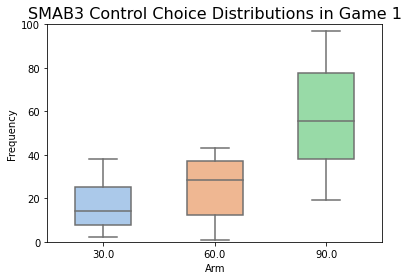

In [17]:
s_g1_counts_box = sns.boxplot( 
                 data=s_g1_counts, 
                 width=0.5,
                 palette="pastel")
s_g1_counts_box.axes.set_title("SMAB3 Control Choice Distributions in Game 1",
                    fontsize=16)

plot_file_path='figures/s_g1_counts_box.jpg'
 
plt.ylim(0, 100)
s_g1_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
s_g1_counts_box.figure.savefig(plot_file_path,
                    format='jpeg')

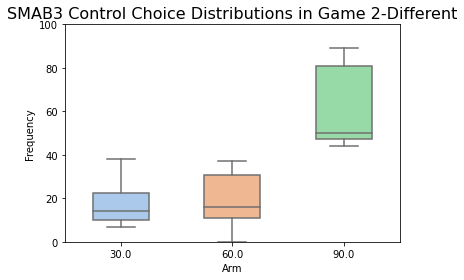

In [18]:
s_g2d_counts_box = sns.boxplot( 
                 data=s_g2d_counts, 
                 width=0.5,
                 palette="pastel")
s_g2d_counts_box.axes.set_title("SMAB3 Control Choice Distributions in Game 2-Different",
                    fontsize=16)

plot_file_path='figures/s_g2d_counts_box.jpg'
 
plt.ylim(0, 100)
s_g2d_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
s_g2d_counts_box.figure.savefig(plot_file_path,
                    format='jpeg')

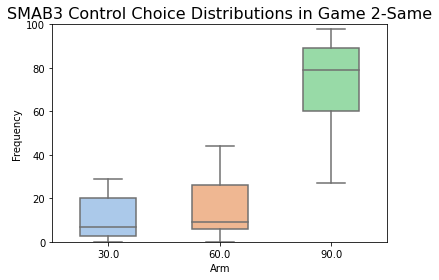

In [19]:
s_g2s_counts_box = sns.boxplot( 
                 data=s_g2s_counts, 
                 width=0.5,
                 palette="pastel")
s_g2s_counts_box.axes.set_title("SMAB3 Control Choice Distributions in Game 2-Same",
                    fontsize=16)

plot_file_path='figures/s_g2s_counts_box.jpg'
 
plt.ylim(0, 100)
s_g2s_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
s_g2s_counts_box.figure.savefig(plot_file_path,
                    format='jpeg')

In [20]:
s_g1_counts.describe()

,30.0,60.0,90.0
count,14.000000,14.000000,14.000000
mean,16.285714,24.571429,59.142857
std,11.625096,14.452651,24.886997
min,2.000000,1.000000,19.000000
25%,7.750000,12.250000,38.250000
50%,14.000000,28.500000,55.500000
75%,25.000000,37.250000,77.500000
max,38.000000,43.000000,97.000000


In [21]:
s_g2d_counts.describe()

,30.0,60.0,90.0
count,7.000000,7.000000,7.000000
mean,17.714286,19.428571,62.857143
std,11.161157,13.673053,19.953517
min,7.000000,0.000000,44.000000
25%,10.000000,11.000000,47.500000
50%,14.000000,16.000000,50.000000
75%,22.500000,30.500000,81.000000
max,38.000000,37.000000,89.000000


In [22]:
s_g2s_counts.describe()

,30.0,60.0,90.0
count,7.000000,7.000000,7.000000
mean,11.571429,16.714286,71.714286
std,12.204605,15.913456,26.662797
min,0.000000,0.000000,27.000000
25%,2.500000,6.000000,60.000000
50%,7.000000,9.000000,79.000000
75%,20.000000,26.000000,89.000000
max,29.000000,44.000000,98.000000


In [23]:
#no sig overall difference b/w s and d 
sp.stats.ttest_ind(s_g2d_counts.loc[ : , s_g2d_counts.columns != 'map'],s_g2s_counts.loc[ : , s_g2s_counts.columns != 'map'])

Ttest_indResult(statistic=array([ 0.98270206,  0.34228216, -0.70366763]), pvalue=array([0.34515282, 0.73805888, 0.49506753]))

In [24]:
#can combine last 3 functions into 1\

In [25]:
s_map = get_hole_probs_map(s_dict)

In [26]:
s_map

{'s01_p1_g1':    h1_prob  h2_prob  h3_prob
 0       90       30       60,
 's01_p1_g2':    h1_prob  h2_prob  h3_prob
 0       60       90       30,
 's03_p1_g1':    h1_prob  h2_prob  h3_prob
 0       90       60       30,
 's03_p1_g2':    h1_prob  h2_prob  h3_prob
 0       60       30       90,
 's05_p1_g1':    h1_prob  h2_prob  h3_prob
 0       60       30       90,
 's05_p1_g2':    h1_prob  h2_prob  h3_prob
 0        0       90       30,
 's06_p1_g1':    h1_prob  h2_prob  h3_prob
 0       30       60       90,
 's06_p1_g2':    h1_prob  h2_prob  h3_prob
 0       60       90       30,
 's07_p1_g1':    h1_prob  h2_prob  h3_prob
 0       90       30       60,
 's07_p1_g2':    h1_prob  h2_prob  h3_prob
 0       60       90       30,
 's08_p1_g1':    h1_prob  h2_prob  h3_prob
 0       30       90       60,
 's08_p1_g2':    h1_prob  h2_prob  h3_prob
 0       90       60       30,
 's09_p1_g1':    h1_prob  h2_prob  h3_prob
 0       90       30       60,
 's09_p1_g2':    h1_prob  h2_prob  h3_

In [27]:
'''based on these mappings, we can see that some of the subjects had the same hole-probability mappings in g1 and g2, while other subjects had different mappings in g1 and g2'''


'based on these mappings, we can see that some of the subjects had the same hole-probability mappings in g1 and g2, while other subjects had different mappings in g1 and g2'

In [28]:
s_g1_scores, s_g2_scores = organize_score(s_dict)

In [29]:
s_g1_scores

,pariticipant,score
0,s01_p1_g1_score,60.0
1,s03_p1_g1_score,63.0
2,s05_p1_g1_score,77.0
3,s06_p1_g1_score,82.0
4,s07_p1_g1_score,63.0
5,s08_p1_g1_score,90.0
6,s09_p1_g1_score,65.0
7,s11_p1_g1_score,60.0
8,s12_p1_g1_score,83.0
9,s15_p1_g1_score,74.0


In [30]:
s_g2_scores

,pariticipant,score
0,s01_p1_g2_score,74.0
1,s03_p1_g2_score,71.0
2,s05_p1_g2_score,88.0
3,s06_p1_g2_score,87.0
4,s07_p1_g2_score,68.0
5,s08_p1_g2_score,80.0
6,s09_p1_g2_score,70.0
7,s11_p1_g2_score,61.0
8,s12_p1_g2_score,86.0
9,s15_p1_g2_score,90.0


In [31]:
#we create a column indicating whether it is the same or different mappings
s_g2_scores['map'] = ['d','d','d','d','d','d','d','s','s','s','s','s','s','s']

In [32]:
'''split s_g2 into g2s (same hole-probability mappings in games 1 and 2) and g2d (different hole-probability mappings 
in games 1 and 2)'''
s_g2d_scores = s_g2_scores[s_g2_scores['map'] == 'd']
s_g2s_scores = s_g2_scores[s_g2_scores['map'] == 's']

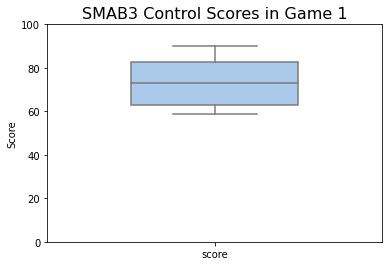

In [33]:
s_g1_scores_box = sns.boxplot( 
                 data=s_g1_scores,
                 width=0.5,
                 palette="pastel")
s_g1_scores_box.axes.set_title("SMAB3 Control Scores in Game 1",
                    fontsize=16)

plot_file_path='figures/s_g1_scores_box.jpg'
 
plt.ylim(0, 100)
s_g1_scores_box.axes.set(ylabel='Score')

# save as jpeg
s_g1_scores_box.figure.savefig(plot_file_path,
                    format='jpeg')

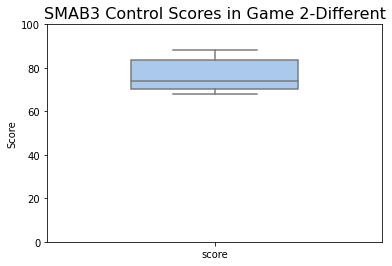

In [34]:
s_g2d_scores_box = sns.boxplot( 
                 data=s_g2d_scores,
                 width=0.5,
                 palette="pastel")
s_g2d_scores_box.axes.set_title("SMAB3 Control Scores in Game 2-Different",
                    fontsize=16)

plot_file_path='figures/s_g2d_scores_box.jpg'
 
plt.ylim(0, 100)
s_g2d_scores_box.axes.set(ylabel='Score')

# save as jpeg
s_g2d_scores_box.figure.savefig(plot_file_path,
                    format='jpeg')

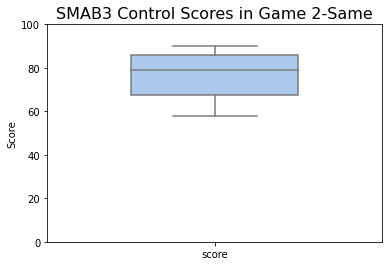

In [35]:
s_g2s_scores_box = sns.boxplot( 
                 data=s_g2s_scores,
                 width=0.5,
                 palette="pastel")
s_g2s_scores_box.axes.set_title("SMAB3 Control Scores in Game 2-Same",
                    fontsize=16)

plot_file_path='figures/s_g2s_scores_box.jpg'
 
plt.ylim(0, 100)
s_g2s_scores_box.axes.set(ylabel='Score')

# save as jpeg
s_g2s_scores_box.figure.savefig(plot_file_path,
                    format='jpeg')

In [36]:
s_g1_scores.describe()

,score
count,14.000000
mean,72.714286
std,11.006492
min,59.000000
25%,63.000000
50%,73.000000
75%,82.750000
max,90.000000


In [37]:
s_g2d_scores.describe()

,score
count,7.000000
mean,76.857143
std,8.214389
min,68.000000
25%,70.500000
50%,74.000000
75%,83.500000
max,88.000000


In [38]:
s_g2s_scores.describe()

,score
count,7.000000
mean,76.285714
std,12.632159
min,58.000000
25%,67.500000
50%,79.000000
75%,86.000000
max,90.000000


In [39]:
'''These dictionaries and dataframes are made available to use in other notebooks'''
%store s_g1_scores
%store s_g2_scores
%store s_g2s_scores
%store s_g2d_scores
%store s_g1_counts
%store s_g2_counts
%store s_g2s_counts
%store s_g2d_counts
%store s_map

Stored 's_g1_scores' (DataFrame)
Stored 's_g2_scores' (DataFrame)
Stored 's_g2s_scores' (DataFrame)
Stored 's_g2d_scores' (DataFrame)
Stored 's_g1_counts' (DataFrame)
Stored 's_g2_counts' (DataFrame)
Stored 's_g2s_counts' (DataFrame)
Stored 's_g2d_counts' (DataFrame)
Stored 's_map' (dict)


In [ ]:
#function to make df's for choice behavior in games 1 and 2 (s/d) for each condition from dictionaries with df's

In [ ]:
#in data_import?
#function to make df's for hole-prob mappings in games 1 and 2 (s/d) for each condition from dictionaries with df's

In [ ]:
#repeat for c, m, and j

# SMAB4 control

In [52]:
c_map = get_hole_probs_map(c_dict)

In [53]:
c_map

{'c02_p1_g1':    h1_prob  h2_prob  h3_prob
 0       90       30       60,
 'c02_p1_g2':    h1_prob  h2_prob  h3_prob
 0       60       90       30,
 'c03_p1_g1':    h1_prob  h2_prob  h3_prob
 0       30       60       90,
 'c03_p1_g2':    h1_prob  h2_prob  h3_prob
 0       60       90       30,
 'c05_p1_g1':    h1_prob  h2_prob  h3_prob
 0       30       60       90,
 'c05_p1_g2':    h1_prob  h2_prob  h3_prob
 0       60       90       30,
 'c06_p1_g1':    h1_prob  h2_prob  h3_prob
 0       30       90       60,
 'c06_p1_g2':    h1_prob  h2_prob  h3_prob
 0       90       60       30,
 'c09_p1_g1':    h1_prob  h2_prob  h3_prob
 0       90       30       60,
 'c09_p1_g2':    h1_prob  h2_prob  h3_prob
 0       60       90       30,
 'c10_p1_g1':    h1_prob  h2_prob  h3_prob
 0       90       60       30,
 'c10_p1_g2':    h1_prob  h2_prob  h3_prob
 0       30       90       60,
 'c11_p1_g1':    h1_prob  h2_prob  h3_prob
 0       60       90       30,
 'c11_p1_g2':    h1_prob  h2_prob  h3_

In [41]:
c_g1_counts, c_g2_counts = get_value_counts(c_dict)

In [44]:
#need to make sure this is in the correct order 
c_g2_counts['map'] = ['d','d','d','d','d','d','d','s','s','s','s','s','s','s']

In [45]:
#separate c_g2_counts into same and different
c_g2d_counts = c_g2_counts[c_g2_counts['map'] == 'd']
c_g2s_counts = c_g2_counts[c_g2_counts['map'] == 's']

In [46]:
c_g1_counts

,30,60,90
c02_p1_g1,13,44,43
c03_p1_g1,12,4,84
c05_p1_g1,34,31,35
c06_p1_g1,29,29,42
c09_p1_g1,28,47,25
c10_p1_g1,9,13,78
c11_p1_g1,19,38,43
c12_p1_g1,33,47,20
c13_p1_g1,24,34,42
c14_p1_g1,20,23,57


In [47]:
c_g2s_counts

,30,60,90,map
c12_p1_g2,38,44,18,s
c13_p1_g2,22,31,47,s
c14_p1_g2,19,30,51,s
c15_p1_g2,2,16,82,s
c16_p1_g2,7,24,69,s
c17_p1_g2,9,28,63,s
c18_p1_g2,15,14,71,s


In [48]:
c_g2d_counts

,30,60,90,map
c02_p1_g2,3,16,81,d
c03_p1_g2,5,12,83,d
c05_p1_g2,34,30,36,d
c06_p1_g2,36,35,30,d
c09_p1_g2,45,37,18,d
c10_p1_g2,11,24,65,d
c11_p1_g2,9,24,67,d


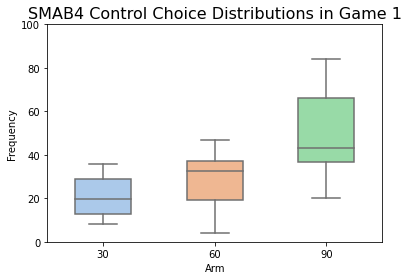

In [49]:
c_g1_counts_box = sns.boxplot( 
                 data=c_g1_counts, 
                 width=0.5,
                 palette="pastel")
c_g1_counts_box.axes.set_title("SMAB4 Control Choice Distributions in Game 1",
                    fontsize=16)

plot_file_path='figures/c_g1_counts_box.jpg'
 
plt.ylim(0, 100)
c_g1_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
c_g1_counts_box.figure.savefig(plot_file_path,
                    format='jpeg')

In [54]:
c_g1_counts.describe()

,30,60,90
count,14.000000,14.000000,14.000000
mean,21.142857,29.000000,49.857143
std,9.590517,13.677607,21.037904
min,8.000000,4.000000,20.000000
25%,13.000000,19.250000,36.750000
50%,19.500000,32.500000,43.000000
75%,28.750000,37.000000,66.000000
max,36.000000,47.000000,84.000000


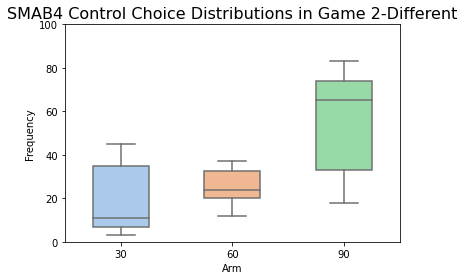

In [50]:
c_g2d_counts_box = sns.boxplot( 
                 data=c_g2d_counts, 
                 width=0.5,
                 palette="pastel")
c_g2d_counts_box.axes.set_title("SMAB4 Control Choice Distributions in Game 2-Different",
                    fontsize=16)

plot_file_path='figures/c_g2d_counts_box.jpg'
 
plt.ylim(0, 100)
c_g2d_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
c_g2d_counts_box.figure.savefig(plot_file_path,
                    format='jpeg')

In [55]:
c_g2d_counts.describe()

,30,60,90
count,7.000000,7.000000,7.000000
mean,20.428571,25.428571,54.285714
std,17.280597,9.306935,25.998168
min,3.000000,12.000000,18.000000
25%,7.000000,20.000000,33.000000
50%,11.000000,24.000000,65.000000
75%,35.000000,32.500000,74.000000
max,45.000000,37.000000,83.000000


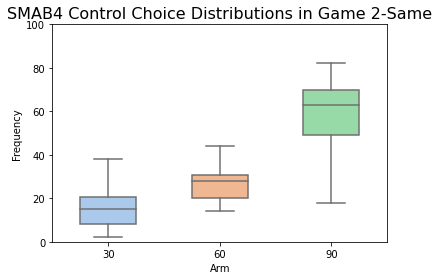

In [51]:
c_g2s_counts_box = sns.boxplot( 
                 data=c_g2s_counts, 
                 width=0.5,
                 palette="pastel")
c_g2s_counts_box.axes.set_title("SMAB4 Control Choice Distributions in Game 2-Same",
                    fontsize=16)

plot_file_path='figures/c_g2s_counts_box.jpg'
 
plt.ylim(0, 100)
c_g2s_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
c_g2s_counts_box.figure.savefig(plot_file_path,
                    format='jpeg')

In [56]:
c_g2s_counts.describe()

,30,60,90
count,7.000000,7.000000,7.000000
mean,16.000000,26.714286,57.285714
std,11.944315,10.111286,21.045303
min,2.000000,14.000000,18.000000
25%,8.000000,20.000000,49.000000
50%,15.000000,28.000000,63.000000
75%,20.500000,30.500000,70.000000
max,38.000000,44.000000,82.000000


In [57]:
c_g1_scores, c_g2_scores = organize_score(c_dict)

In [64]:
c_g2_counts

,30,60,90,map
c02_p1_g2,3,16,81,d
c03_p1_g2,5,12,83,d
c05_p1_g2,34,30,36,d
c06_p1_g2,36,35,30,d
c09_p1_g2,45,37,18,d
c10_p1_g2,11,24,65,d
c11_p1_g2,9,24,67,d
c12_p1_g2,38,44,18,s
c13_p1_g2,22,31,47,s
c14_p1_g2,19,30,51,s


In [63]:
c_g2_scores

,pariticipant,score
0,c02_p1_g2_score,85.0
1,c03_p1_g2_score,73.0
2,c05_p1_g2_score,72.0
3,c06_p1_g2_score,53.0
4,c09_p1_g2_score,44.0
5,c10_p1_g2_score,79.0
6,c11_p1_g2_score,82.0
7,c12_p1_g2_score,53.0
8,c13_p1_g2_score,68.0
9,c14_p1_g2_score,65.0


In [70]:
#need to make sure this is in the correct order 
c_g2_scores['map'] = ['d','d','d','d','d','d','d','s','s','s','s','s','s','s']

ValueError: Length of values (14) does not match length of index (17)

In [62]:
'''split s_g2 into g2s (same hole-probability mappings in games 1 and 2) and g2d (different hole-probability mappings 
in games 1 and 2)'''
c_g2d_scores = c_g2_scores[c_g2_scores['map'] == 'd']
c_g2s_scores = c_g2_scores[c_g2_scores['map'] == 's']

KeyError: 'map'

In [65]:
c_dict

{'c02':      game number  trial  player  arm  probability  reward       time  \
 0              1      1       1    2           30       0  15.537727   
 1              1      1       2    1           90       1   3.444611   
 2              1      2       1    2           30       0   5.022095   
 3              1      2       2    1           90       1   3.132740   
 4              1      3       1    1           90       0   4.038466   
 ..           ...    ...     ...  ...          ...     ...        ...   
 395            2     98       2    2           60       0   3.202149   
 396            2     99       1    2           90       1   3.566161   
 397            2     99       2    2           60       1   3.233752   
 398            2    100       1    2           90       1   3.861861   
 399            2    100       2    2           60       1   3.329955   
 
      P1 score  P2 score  
 0           0         0  
 1           0         1  
 2           0         1  
 3     

# SMAB3 Social

In [71]:
j_map = get_hole_probs_map(j_dict)

In [72]:
j_map

{'j01_p1_g1':    h1_prob  h2_prob  h3_prob
 0       90       30       60,
 'j01_p1_g2':    h1_prob  h2_prob  h3_prob
 0       30       90       60,
 'j01_p2_g1':    h1_prob  h2_prob  h3_prob
 0       30       90       60,
 'j01_p2_g2':    h1_prob  h2_prob  h3_prob
 0       90       30       60,
 'j02_p1_g1':    h1_prob  h2_prob  h3_prob
 0       60       90       30,
 'j02_p1_g2':    h1_prob  h2_prob  h3_prob
 0       30       60       90,
 'j02_p2_g1':    h1_prob  h2_prob  h3_prob
 0       60       30       90,
 'j02_p2_g2':    h1_prob  h2_prob  h3_prob
 0       90       60       30,
 'j03_p1_g1':    h1_prob  h2_prob  h3_prob
 0       60       90       30,
 'j03_p1_g2':    h1_prob  h2_prob  h3_prob
 0       30       60       90,
 'j03_p2_g1':    h1_prob  h2_prob  h3_prob
 0       60       30       90,
 'j03_p2_g2':    h1_prob  h2_prob  h3_prob
 0       90       60       30,
 'j04_p1_g1':    h1_prob  h2_prob  h3_prob
 0       90       30       60,
 'j04_p1_g2':    h1_prob  h2_prob  h3_

In [75]:
j_g1_counts, j_g2_counts = get_value_counts(j_dict)

In [76]:
j_g2_counts

,30,60,90
j01_p1_g2,18.0,28.0,54.0
j01_p2_g2,26.0,37.0,37.0
j02_p1_g2,27.0,27.0,46.0
j02_p2_g2,9.0,26.0,65.0
j03_p1_g2,7.0,23.0,70.0
j03_p2_g2,10.0,7.0,83.0
j04_p1_g2,42.0,32.0,26.0
j04_p2_g2,40.0,40.0,20.0
j05_p1_g2,20.0,15.0,65.0
j05_p2_g2,7.0,40.0,53.0


In [78]:
j_g2_counts['map'] = ['d','d','d','d','d','d','d','d','d','d','d','d','d','d','d','d','s','s','s','s']

In [81]:
j_g2_counts

,30,60,90,map
j01_p1_g2,18.0,28.0,54.0,d
j01_p2_g2,26.0,37.0,37.0,d
j02_p1_g2,27.0,27.0,46.0,d
j02_p2_g2,9.0,26.0,65.0,d
j03_p1_g2,7.0,23.0,70.0,d
j03_p2_g2,10.0,7.0,83.0,d
j04_p1_g2,42.0,32.0,26.0,d
j04_p2_g2,40.0,40.0,20.0,d
j05_p1_g2,20.0,15.0,65.0,d
j05_p2_g2,7.0,40.0,53.0,d


In [83]:
j_g2d_counts = j_g2_counts[j_g2_counts['map'] == 'd']
j_g2s_counts = j_g2_counts[j_g2_counts['map'] == 's']

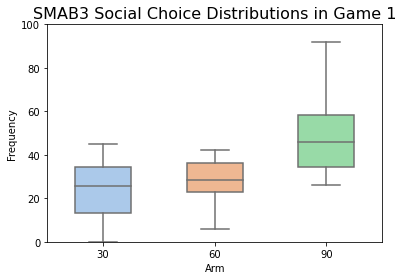

In [84]:
j_g1_counts_box = sns.boxplot( 
                 data=j_g1_counts, 
                 width=0.5,
                 palette="pastel")
j_g1_counts_box.axes.set_title("SMAB3 Social Choice Distributions in Game 1",
                    fontsize=16)

plot_file_path='figures/j_g1_counts_box.jpg'
 
plt.ylim(0, 100)
j_g1_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
j_g1_counts_box.figure.savefig(plot_file_path,
                    format='jpeg')

In [85]:
j_g1_counts.describe()

,30,60,90
count,20.000000,20.000000,20.000000
mean,23.600000,28.450000,47.950000
std,13.612688,9.746659,18.207792
min,0.000000,6.000000,26.000000
25%,13.250000,22.750000,34.250000
50%,25.500000,28.500000,46.000000
75%,34.500000,36.250000,58.250000
max,45.000000,42.000000,92.000000


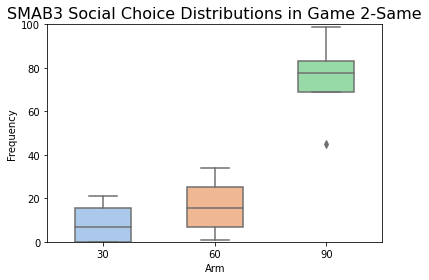

In [86]:
j_g2s_counts_box = sns.boxplot( 
                 data=j_g2s_counts, 
                 width=0.5,
                 palette="pastel")
j_g2s_counts_box.axes.set_title("SMAB3 Social Choice Distributions in Game 2-Same",
                    fontsize=16)

plot_file_path='figures/j_g2s_counts_box.jpg'
 
plt.ylim(0, 100)
j_g2s_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
j_g2s_counts_box.figure.savefig(plot_file_path,
                    format='jpeg')

In [88]:
j_g2s_counts.describe()

,30,60,90
count,4.00,4.000000,4.000000
mean,8.75,16.500000,74.750000
std,10.50,14.525839,22.276669
min,0.00,1.000000,45.000000
25%,0.00,7.000000,69.000000
50%,7.00,15.500000,77.500000
75%,15.75,25.000000,83.250000
max,21.00,34.000000,99.000000


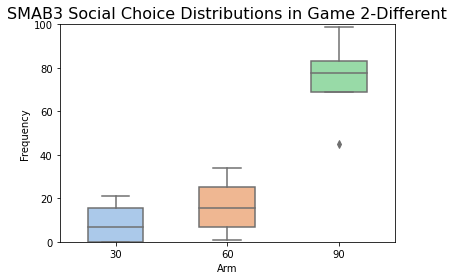

In [87]:
j_g2d_counts_box = sns.boxplot( 
                 data=j_g2s_counts, 
                 width=0.5,
                 palette="pastel")
j_g2d_counts_box.axes.set_title("SMAB3 Social Choice Distributions in Game 2-Different",
                    fontsize=16)

plot_file_path='figures/j_g2d_counts_box.jpg'
 
plt.ylim(0, 100)
j_g2d_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
j_g2d_counts_box.figure.savefig(plot_file_path,
                    format='jpeg')

In [89]:
j_g2d_counts.describe()

,30,60,90
count,16.000000,16.000000,16.000000
mean,16.312500,25.937500,57.750000
std,11.886792,12.891696,20.286284
min,4.000000,1.000000,20.000000
25%,7.750000,18.000000,48.250000
50%,11.500000,26.500000,58.500000
75%,21.500000,37.750000,66.250000
max,42.000000,43.000000,95.000000


In [90]:
j_g1_scores, j_g2_scores = organize_score(j_dict)

In [91]:
j_g1_scores

,pariticipant,score
0,j01_p1_g1_score,57
1,j01_p2_g1_score,61
2,j02_p1_g1_score,54
3,j02_p2_g1_score,68
4,j03_p1_g1_score,69
5,j03_p2_g1_score,67
6,j04_p1_g1_score,64
7,j04_p2_g1_score,56
8,j05_p1_g1_score,77
9,j05_p2_g1_score,70


In [92]:
j_g2_scores

,pariticipant,score
0,j01_p1_g2_score,73
1,j01_p2_g2_score,60
2,j02_p1_g2_score,72
3,j02_p2_g2_score,76
4,j03_p1_g2_score,82
5,j03_p2_g2_score,75
6,j04_p1_g2_score,60
7,j04_p2_g2_score,54
8,j05_p1_g2_score,70
9,j05_p2_g2_score,78


In [93]:
j_g2_scores['map'] = ['d','d','d','d','d','d','d','d','d','d','d','d','d','d','d','d','s','s','s','s']

In [96]:
j_g2d_scores = j_g2_scores[j_g2_scores['map'] == 'd']
j_g2s_scores = j_g2_scores[j_g2_scores['map'] == 's']

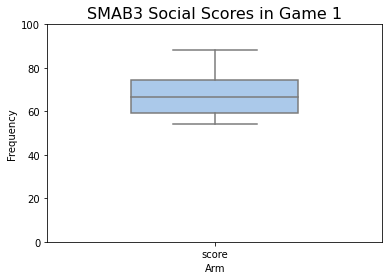

In [94]:
j_g1_scores_box = sns.boxplot( 
                 data=j_g1_scores, 
                 width=0.5,
                 palette="pastel")
j_g1_scores_box.axes.set_title("SMAB3 Social Scores in Game 1",
                    fontsize=16)

plot_file_path='figures/j_g1_scores_box.jpg'
 
plt.ylim(0, 100)
j_g1_scores_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
j_g1_scores_box.figure.savefig(plot_file_path,
                    format='jpeg')

In [99]:
j_g1_scores.describe()

,score
count,20.000000
mean,66.850000
std,9.653333
min,54.000000
25%,59.250000
50%,66.500000
75%,74.250000
max,88.000000


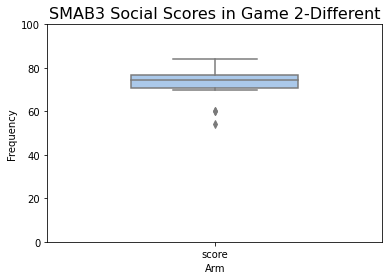

In [110]:
j_g2d_scores_box = sns.boxplot( 
                 data=j_g2d_scores, 
                 width=0.5,
                 palette="pastel")
j_g2d_scores_box.axes.set_title("SMAB3 Social Scores in Game 2-Different",
                    fontsize=16)

plot_file_path='figures/j_g2d_scores_box.jpg'
 
plt.ylim(0, 100)
j_g2d_scores_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
j_g2d_scores_box.figure.savefig(plot_file_path,
                    format='jpeg')

In [100]:
j_g2d_scores.describe()

,score
count,16.00000
mean,72.68750
std,8.42788
min,54.00000
25%,70.75000
50%,74.50000
75%,76.50000
max,84.00000


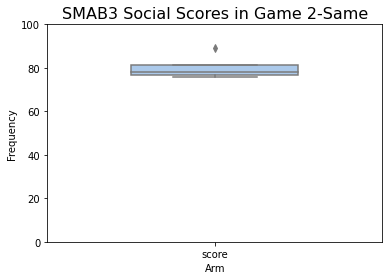

In [97]:
j_g2s_scores_box = sns.boxplot( 
                 data=j_g2s_scores, 
                 width=0.5,
                 palette="pastel")
j_g2s_scores_box.axes.set_title("SMAB3 Social Scores in Game 2-Same",
                    fontsize=16)

plot_file_path='figures/j_g2s_scores_box.jpg'
 
plt.ylim(0, 100)
j_g2s_scores_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
j_g2s_scores_box.figure.savefig(plot_file_path,
                    format='jpeg')

In [101]:
j_g2s_scores.describe()

,score
count,4.000000
mean,80.250000
std,5.965177
min,76.000000
25%,76.750000
50%,78.000000
75%,81.500000
max,89.000000


In [106]:
j_g2s_scores

,pariticipant,score,map
16,j10_p1_g2_score,76,s
17,j10_p2_g2_score,79,s
18,j11_p1_g2_score,77,s
19,j11_p2_g2_score,89,s


In [ ]:
# sp.stats.ttest_ind(j_g2d_scores['score'],j_g2s_scores['score'])

In [111]:
'''These dictionaries and dataframes are made available to use in other notebooks'''
%store j_g1_scores
%store j_g2_scores
%store j_g2s_scores
%store j_g2d_scores
%store j_g1_counts
%store j_g2_counts
%store j_g2s_counts
%store j_g2d_counts
%store j_map

Stored 'j_g1_scores' (DataFrame)
Stored 'j_g2_scores' (DataFrame)
Stored 'j_g2s_scores' (DataFrame)
Stored 'j_g2d_scores' (DataFrame)
Stored 'j_g1_counts' (DataFrame)
Stored 'j_g2_counts' (DataFrame)
Stored 'j_g2s_counts' (DataFrame)
Stored 'j_g2d_counts' (DataFrame)
Stored 'j_map' (dict)


# SMAB4 social

In [112]:
m_map = get_hole_probs_map(m_dict)

In [113]:
#issue with m07
m_map

{'m05_p1_g1':    h1_prob  h2_prob  h3_prob
 0       90       60       30,
 'm05_p1_g2':    h1_prob  h2_prob  h3_prob
 0       30       90       60,
 'm05_p2_g1':    h1_prob  h2_prob  h3_prob
 0       30       60       90,
 'm05_p2_g2':    h1_prob  h2_prob  h3_prob
 0       90       30       60,
 'm01_p1_g1':    h1_prob  h2_prob  h3_prob
 0     90.0     60.0     30.0,
 'm01_p1_g2':    h1_prob  h2_prob  h3_prob
 0     60.0     30.0     90.0,
 'm01_p2_g1':    h1_prob  h2_prob  h3_prob
 0     30.0     60.0     90.0,
 'm01_p2_g2':    h1_prob  h2_prob  h3_prob
 0     60.0     90.0     30.0,
 'm03_p1_g1':    h1_prob  h2_prob  h3_prob
 0     30.0     90.0     60.0,
 'm03_p1_g2':    h1_prob  h2_prob  h3_prob
 0     90.0     30.0     60.0,
 'm03_p2_g1':    h1_prob  h2_prob  h3_prob
 0     90.0     30.0     60.0,
 'm03_p2_g2':    h1_prob  h2_prob  h3_prob
 0     30.0     90.0     60.0,
 'm07_p1_g1':    h1_prob  h2_prob  h3_prob
 0      NaN      NaN      NaN,
 'm07_p1_g2':    h1_prob  h2_prob  h3_

In [114]:
m_g1_counts, m_g2_counts = get_value_counts(m_dict)

In [115]:
m_g1_counts

,30.0,60.0,90.0
m05_p1_g1,11.0,26.0,63.0
m05_p2_g1,13.0,31.0,56.0
m01_p1_g1,33.0,38.0,29.0
m01_p2_g1,33.0,28.0,39.0
m03_p1_g1,24.0,45.0,31.0
m03_p2_g1,37.0,23.0,40.0
m07_p1_g1,0.0,0.0,0.0
m07_p2_g1,0.0,0.0,0.0


In [116]:
m_g2_counts

,30.0,60.0,90.0
m05_p1_g2,3.0,66.0,31.0
m05_p2_g2,3.0,4.0,93.0
m01_p1_g2,15.0,8.0,77.0
m01_p2_g2,31.0,20.0,49.0
m03_p1_g2,34.0,46.0,20.0
m03_p2_g2,45.0,23.0,32.0
m07_p1_g2,0.0,0.0,0.0
m07_p2_g2,0.0,0.0,0.0
